In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [36]:
df = pd.read_csv('/content/drive/MyDrive/code testing/trading bots/Sol_historical.csv')
df

,Date,Close,Prev Close,Prev Volume,Prev High,Prev Low
0,4/11/2020,0.78,0.95,87364276,1.31,0.69
1,4/12/2020,0.88,0.78,43862444,1.05,0.77
2,4/13/2020,0.78,0.88,38736897,0.96,0.76
3,4/14/2020,0.66,0.78,18211285,0.89,0.77
4,4/15/2020,0.65,0.66,16747614,0.80,0.63
...,...,...,...,...,...,...
785,6/6/2022,42.43,38.48,998532387,40.00,38.04
786,6/7/2022,39.44,42.43,1955057411,44.45,38.44
787,6/8/2022,38.84,39.44,1974825213,42.45,37.78
788,6/9/2022,39.97,38.84,1211034282,40.53,38.40


In [37]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [38]:
df['200SMA'] = df['Prev Close'].rolling(200).mean()
df['100SMA'] = df['Prev Close'].rolling(100).mean()
df['25SMA'] = df['Prev Close'].rolling(25).mean()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         790 non-null    datetime64[ns]
 1   Close        790 non-null    float64       
 2   Prev Close   790 non-null    float64       
 3   Prev Volume  790 non-null    int64         
 4   Prev High    790 non-null    float64       
 5   Prev Low     790 non-null    float64       
 6   200SMA       591 non-null    float64       
 7   100SMA       691 non-null    float64       
 8   25SMA        766 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 55.7 KB


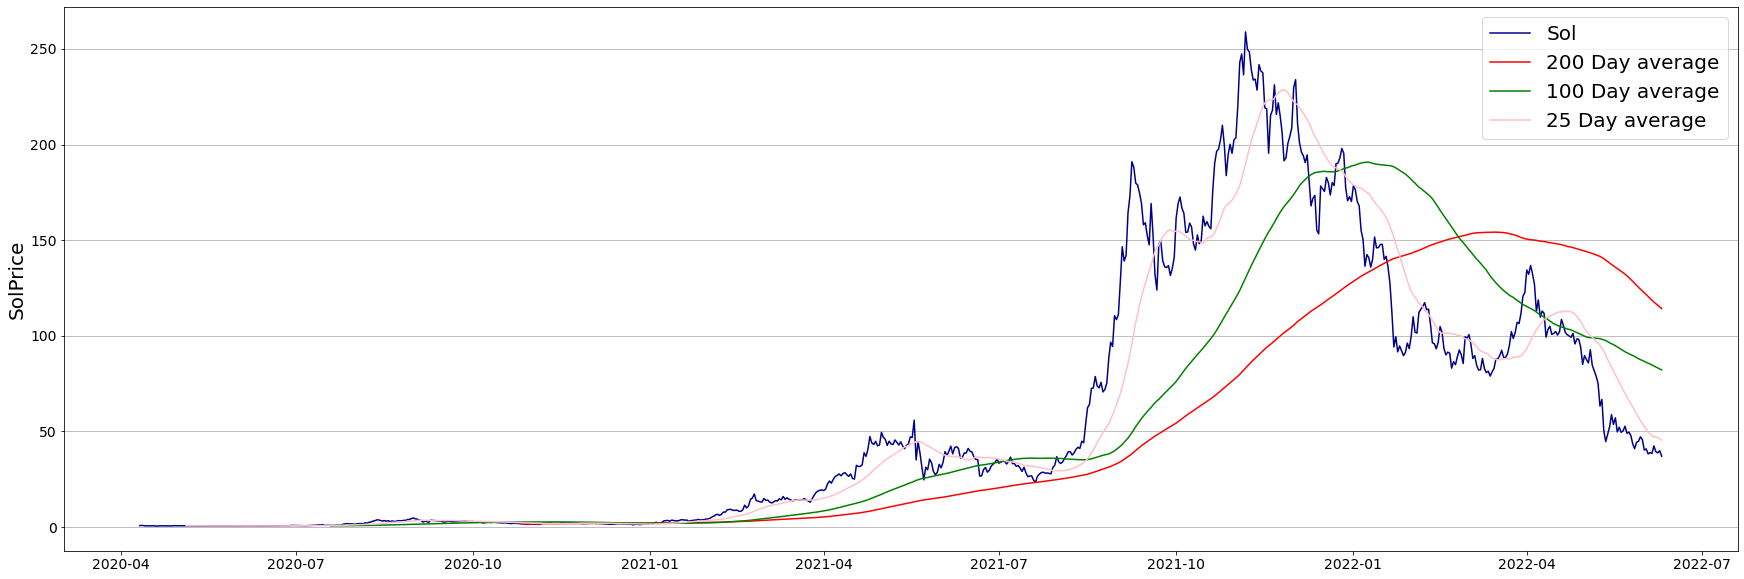

In [39]:
x = 0
y = 790
plt.figure(figsize=(30,10))
plt.plot(df.loc[x:y,'Date'],df.loc[x:y,'Close'],color='DarkBlue', label='Sol')
plt.plot(df.loc[x:y,'Date'],df.loc[x:y,'200SMA'],color='Red', label='200 Day average')
plt.plot(df.loc[x:y,'Date'],df.loc[x:y,'100SMA'],color='Green', label='100 Day average')
plt.plot(df.loc[x:y,'Date'],df.loc[x:y,'25SMA'],color='Pink', label='25 Day average')
plt.ylabel('SolPrice',size=20)
plt.yticks(size=14)
plt.grid(axis='y')
plt.xticks(size=14)
plt.legend(fontsize=20);

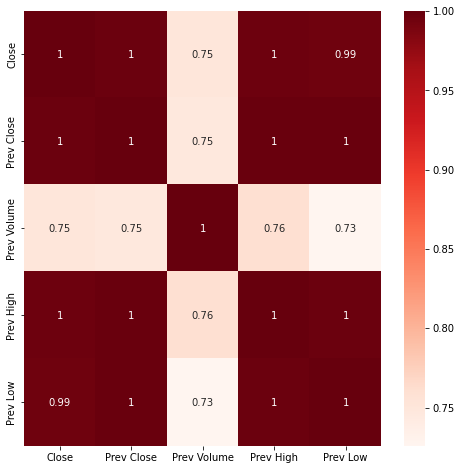

In [8]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(),annot=True,cmap='Reds');

In [9]:
n = len(df)
train_df = df[0:int(n*.7)]
test_df = df[int(n*.7):]

In [10]:
train_df.tail()

,Date,Close,Prev Close,Prev Volume,Prev High,Prev Low
548,2021-10-11,144.86,148.05,1556965341,158.36,146.90
549,2021-10-12,152.74,144.86,1851795187,153.92,140.36
550,2021-10-13,148.18,152.74,2853992440,153.26,137.81
551,2021-10-14,149.76,148.18,2105226551,155.35,144.41
552,2021-10-15,162.60,149.76,1948101208,155.33,147.33


In [11]:
test_df.head()

,Date,Close,Prev Close,Prev Volume,Prev High,Prev Low
553,2021-10-16,157.54,162.60,3970589003,165.12,146.98
554,2021-10-17,159.74,157.54,1531502795,164.71,156.74
555,2021-10-18,157.23,159.74,2168838138,167.43,154.09
556,2021-10-19,156.02,157.23,1698878759,162.86,155.03
557,2021-10-20,175.95,156.02,1400902548,159.41,153.22


In [12]:
train_df = train_df.drop(['Date'],axis=1)
test_df = test_df.drop(['Date'],axis=1)

In [13]:
train_df.head()

,Close,Prev Close,Prev Volume,Prev High,Prev Low
0,0.78,0.95,87364276,1.31,0.69
1,0.88,0.78,43862444,1.05,0.77
2,0.78,0.88,38736897,0.96,0.76
3,0.66,0.78,18211285,0.89,0.77
4,0.65,0.66,16747614,0.80,0.63


In [14]:
test_df.head()

,Close,Prev Close,Prev Volume,Prev High,Prev Low
553,157.54,162.60,3970589003,165.12,146.98
554,159.74,157.54,1531502795,164.71,156.74
555,157.23,159.74,2168838138,167.43,154.09
556,156.02,157.23,1698878759,162.86,155.03
557,175.95,156.02,1400902548,159.41,153.22


In [15]:
scaler = MinMaxScaler()

In [16]:
train_df = scaler.fit_transform(train_df)
train_df.shape

(553, 5)

In [17]:
test_df = scaler.transform(test_df)

In [18]:
def create_dataset(dataset, timestep):
  dataX, datay = [], []
  for i in range(len(dataset)-timestep):
    a = dataset[i:(i+timestep),1:]
    dataX.append(a)
    datay.append(dataset[i + timestep, 0])
  return np.array(dataX), np.array(datay)

In [19]:
timestep = 70
X_train, y_train = create_dataset(train_df, timestep)
X_test, y_test = create_dataset(test_df,timestep)

In [20]:
X_train.shape,y_train.shape

((483, 70, 4), (483,))

In [21]:
import tensorflow as tf

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
opt = keras.optimizers.Adamax(learning_rate=.0008)
cb = keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [24]:

model = Sequential()

n_neurons = X_train.shape[1] * X_train.shape[2]
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))) 
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dense(X_train.shape[2]))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 70, 280)           319200    
                                                                 
 lstm_1 (LSTM)               (None, 280)               628320    
                                                                 
 dense (Dense)               (None, 4)                 1124      
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 948,649
Trainable params: 948,649
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='adam', loss='mse',metrics = ['mae'])

In [26]:
history = model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=50, batch_size=16,callbacks = [cb])

Epoch 1/50
31/31 [==============================] - 40s 973ms/step - loss: 0.0077 - mae: 0.0433 - val_loss: 0.0195 - val_mae: 0.1210
Epoch 2/50
31/31 [==============================] - 24s 789ms/step - loss: 0.0032 - mae: 0.0343 - val_loss: 0.0044 - val_mae: 0.0522
Epoch 3/50
31/31 [==============================] - 15s 473ms/step - loss: 0.0028 - mae: 0.0299 - val_loss: 0.0046 - val_mae: 0.0490
Epoch 4/50
31/31 [==============================] - 16s 505ms/step - loss: 0.0027 - mae: 0.0314 - val_loss: 0.0075 - val_mae: 0.0717
Epoch 5/50
31/31 [==============================] - 20s 636ms/step - loss: 0.0016 - mae: 0.0203 - val_loss: 0.0047 - val_mae: 0.0540
Epoch 6/50
31/31 [==============================] - 15s 494ms/step - loss: 0.0018 - mae: 0.0216 - val_loss: 0.0075 - val_mae: 0.0694
Epoch 7/50
31/31 [==============================] - 22s 724ms/step - loss: 0.0015 - mae: 0.0227 - val_loss: 0.0046 - val_mae: 0.0536


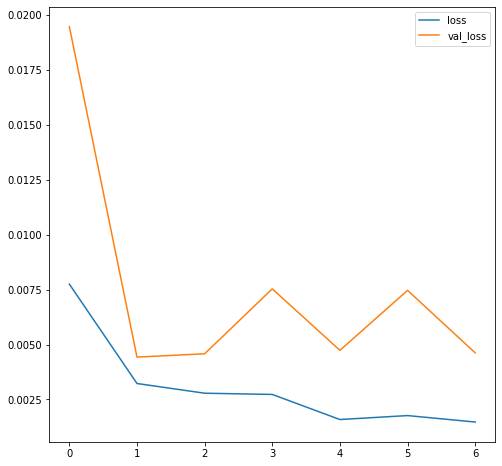

In [27]:
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()

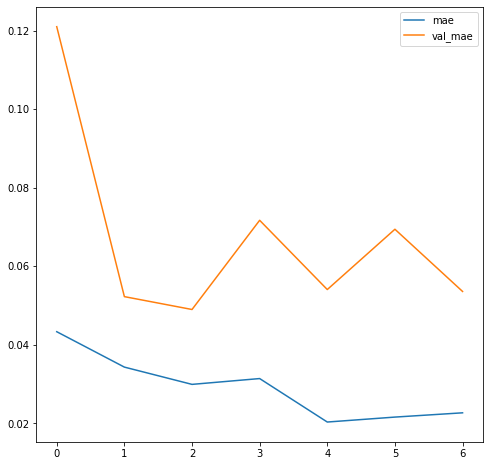

In [28]:
plt.figure(figsize=(8,8))
plt.plot(history.history['mae'], label = "mae")
plt.plot(history.history['val_mae'], label = 'val_mae')
plt.legend()

In [29]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [30]:
from sklearn.metrics import mean_absolute_error

In [31]:
train_predict_dataset_like = np.zeros(shape=(len(train_predict), 5) )
train_predict_dataset_like[:,0] = train_predict[:,0]
train_predict = scaler.inverse_transform(train_predict_dataset_like)[:,0]

test_predict_dataset_like = np.zeros(shape=(len(test_predict), 5) )
test_predict_dataset_like[:,0] = test_predict[:,0]
test_predict = scaler.inverse_transform(test_predict_dataset_like)[:,0]

In [32]:
df.loc[timestep:len(train_predict)+timestep-1,'Train'] = train_predict
df.loc[len(train_predict)+(timestep*2):len(df),'Test'] = test_predict

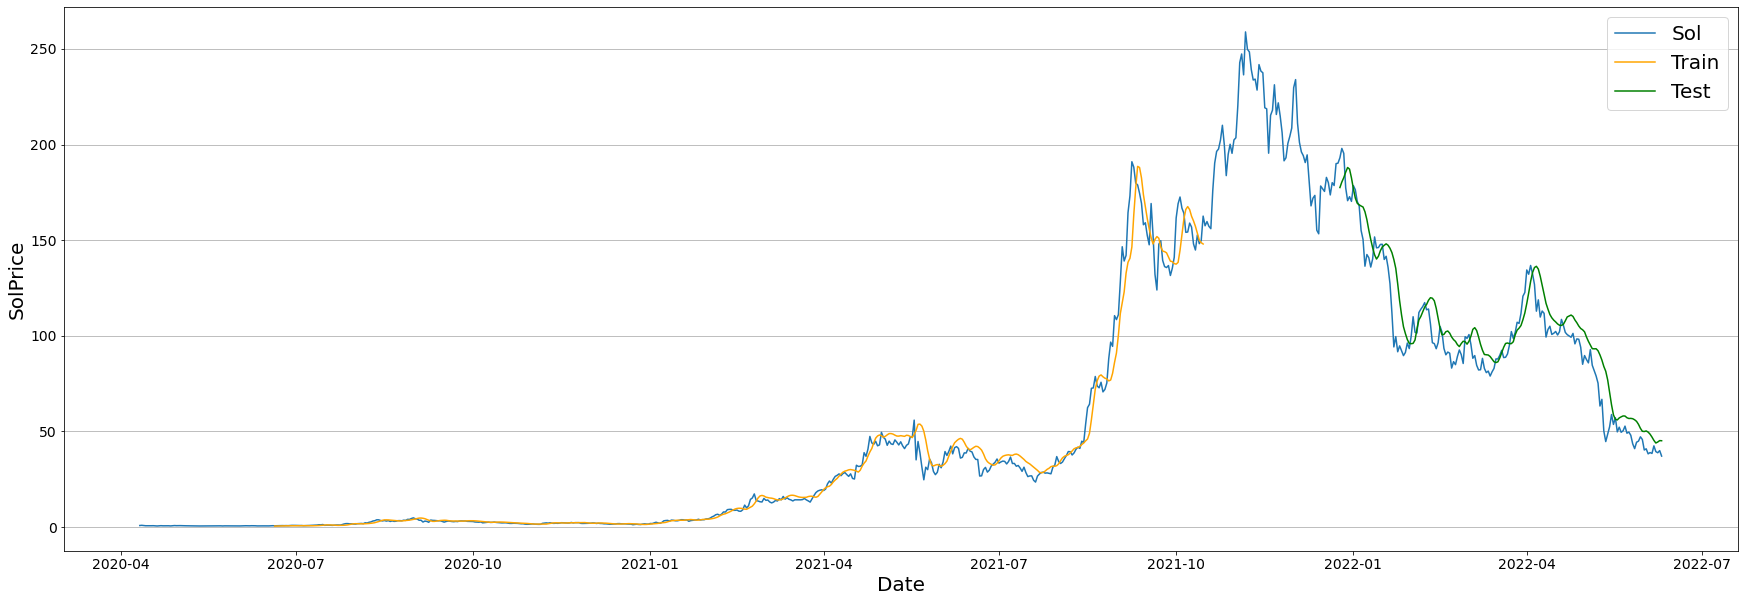

In [33]:
plt.figure(figsize=(30,10))
plt.plot(df['Date'],df['Close'],label='Sol')
plt.plot(df['Date'],df['Train'],color='Orange',label='Train')
plt.plot(df['Date'],df['Test'],color='Green',label='Test')
plt.ylabel('SolPrice',size=20)
plt.xlabel('Date',size=20)
plt.yticks(size=14)
plt.grid(axis='y')
plt.xticks(size=14)
plt.legend(fontsize=20);

In [34]:
len(test_df)

237

In [35]:
#30 day future predection